In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
df = pd.read_csv('fifa_spotify_data')

In [3]:
df

,Unnamed: 0,playlist_name,num_tracks,track_name,track_duration,track_explicit,track_popularity,acousticness,danceability,energy,...,artist2_genres,artist2_popularity,artist3_name,artist3_followers,artist3_genres,artist3_popularity,album_name,album_type,album_popularity,album_release_date
0,0,FIFA 20 Soundtrack,41,Que Calor (feat. J Balvin & El Alfa),169997,False,73,0.037500,0.795,0.885,...,"['latin', 'reggaeton']",95.0,El Alfa,1030909.0,"['dembow', 'latin', 'rap dominicano', 'reggaet...",83.0,Que Calor (feat. J Balvin & El Alfa),single,66,2019-09-11
1,1,FIFA 20 Soundtrack,41,"Yo x Ti, Tu x Mi",201040,False,80,0.462000,0.780,0.759,...,"['latin', 'puerto rican pop', 'reggaeton', 'tr...",93.0,NaN,NaN,NaN,NaN,"Yo x Ti, Tu x Mi",single,73,2019-08-15
2,2,FIFA 20 Soundtrack,41,Swing,179658,False,19,0.006400,0.775,0.717,...,NaN,NaN,NaN,NaN,NaN,NaN,Swing,single,13,2019-07-12
3,3,FIFA 20 Soundtrack,41,Vámono,208329,False,46,0.112000,0.672,0.733,...,NaN,NaN,NaN,NaN,NaN,NaN,Vámono,single,39,2019-09-25
4,4,FIFA 20 Soundtrack,41,Fado,250400,False,42,0.203000,0.821,0.540,...,NaN,NaN,NaN,NaN,NaN,NaN,Fado,single,36,2019-09-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,289,FIFA 18 Soundtrack,45,Caxambu,175000,False,22,0.208000,0.787,0.817,...,NaN,NaN,NaN,NaN,NaN,NaN,Batuk Freak (Instrumentals),album,26,2013
290,290,FIFA 18 Soundtrack,45,Deela Ding,196937,False,0,0.000058,0.653,0.873,...,NaN,NaN,NaN,NaN,NaN,NaN,Vira a Cara,single,0,2015-07-22
291,291,FIFA 18 Soundtrack,45,11 Acre,197413,False,32,0.000102,0.474,0.970,...,NaN,NaN,NaN,NaN,NaN,NaN,Plastic Soul,album,46,2017-08-04
292,292,FIFA 18 Soundtrack,45,Feels Like Summer,195389,False,46,0.013900,0.468,0.939,...,NaN,NaN,NaN,NaN,NaN,NaN,Feels Like Summer,single,39,2017-03-16


In [4]:
# Convert album release date to datetime
df['album_release_date'] = df['album_release_date'].astype('datetime64')

In [5]:
df

,Unnamed: 0,playlist_name,num_tracks,track_name,track_duration,track_explicit,track_popularity,acousticness,danceability,energy,...,artist2_genres,artist2_popularity,artist3_name,artist3_followers,artist3_genres,artist3_popularity,album_name,album_type,album_popularity,album_release_date
0,0,FIFA 20 Soundtrack,41,Que Calor (feat. J Balvin & El Alfa),169997,False,73,0.037500,0.795,0.885,...,"['latin', 'reggaeton']",95.0,El Alfa,1030909.0,"['dembow', 'latin', 'rap dominicano', 'reggaet...",83.0,Que Calor (feat. J Balvin & El Alfa),single,66,2019-09-11
1,1,FIFA 20 Soundtrack,41,"Yo x Ti, Tu x Mi",201040,False,80,0.462000,0.780,0.759,...,"['latin', 'puerto rican pop', 'reggaeton', 'tr...",93.0,NaN,NaN,NaN,NaN,"Yo x Ti, Tu x Mi",single,73,2019-08-15
2,2,FIFA 20 Soundtrack,41,Swing,179658,False,19,0.006400,0.775,0.717,...,NaN,NaN,NaN,NaN,NaN,NaN,Swing,single,13,2019-07-12
3,3,FIFA 20 Soundtrack,41,Vámono,208329,False,46,0.112000,0.672,0.733,...,NaN,NaN,NaN,NaN,NaN,NaN,Vámono,single,39,2019-09-25
4,4,FIFA 20 Soundtrack,41,Fado,250400,False,42,0.203000,0.821,0.540,...,NaN,NaN,NaN,NaN,NaN,NaN,Fado,single,36,2019-09-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,289,FIFA 18 Soundtrack,45,Caxambu,175000,False,22,0.208000,0.787,0.817,...,NaN,NaN,NaN,NaN,NaN,NaN,Batuk Freak (Instrumentals),album,26,2013-01-01
290,290,FIFA 18 Soundtrack,45,Deela Ding,196937,False,0,0.000058,0.653,0.873,...,NaN,NaN,NaN,NaN,NaN,NaN,Vira a Cara,single,0,2015-07-22
291,291,FIFA 18 Soundtrack,45,11 Acre,197413,False,32,0.000102,0.474,0.970,...,NaN,NaN,NaN,NaN,NaN,NaN,Plastic Soul,album,46,2017-08-04
292,292,FIFA 18 Soundtrack,45,Feels Like Summer,195389,False,46,0.013900,0.468,0.939,...,NaN,NaN,NaN,NaN,NaN,NaN,Feels Like Summer,single,39,2017-03-16


In [6]:
df_artist2_genres = df.artist2_genres.dropna()
df_artist3_genres = df.artist3_genres.dropna()

In [7]:
list_of_genres = []
for index, value in df.artist1_genres.items():
    list_string = list(value.replace('\'','').strip('[]').split(', '))
    list_of_genres.append(list_string)
for index, value in df_artist2_genres.items():
    list_string = list(value.replace('\'','').strip('[]').split(', '))
    if list_string == '':
        print(err)
    list_of_genres.append(list_string)
for index, value in df_artist3_genres.items():
    list_string = list(value.replace('\'','').strip('[]').split(', '))
    list_of_genres.append(list_string)

In [8]:
list_of_genres = list(np.concatenate(list_of_genres).flat)

In [9]:
list_of_genres

['dance pop',
 'edm',
 'electro house',
 'moombahton',
 'pop',
 'pop rap',
 'r&b en espanol',
 'electropop',
 'pop',
 'indietronica',
 'latintronica',
 'puerto rican indie',
 'german pop',
 'escape room',
 'indie r&b',
 'indie soul',
 'trap queen',
 'uk alternative hip hop',
 'alternative r&b',
 'escape room',
 'indie pop',
 'modern alternative rock',
 'modern rock',
 'rock',
 'irish hip hop',
 'indie r&b',
 '',
 'english indie rock',
 'kent indie',
 'alternative r&b',
 'chicago rap',
 'hip hop',
 'indie r&b',
 'indie soul',
 'neo soul',
 'rap',
 'southern hip hop',
 'underground hip hop',
 'alternative r&b',
 'electropop',
 'indie r&b',
 'nyc pop',
 'vapor soul',
 '',
 'vapor pop',
 '',
 'israeli pop',
 'alternative pop rock',
 'pop',
 'london indie',
 'norwegian contemporary jazz',
 'norwegian indie',
 'norwegian pop',
 'scandinavian r&b',
 'alternative dance',
 'indie rock',
 'indietronica',
 'modern alternative rock',
 'modern rock',
 'new rave',
 'oxford indie',
 'rock',
 'austria

In [10]:
cnt = Counter()
for genre in list_of_genres:
    cnt[genre] += 1
cnt

Counter({'dance pop': 11,
         'edm': 18,
         'electro house': 11,
         'moombahton': 4,
         'pop': 37,
         'pop rap': 5,
         'r&b en espanol': 1,
         'electropop': 33,
         'indietronica': 48,
         'latintronica': 1,
         'puerto rican indie': 1,
         'german pop': 3,
         'escape room': 6,
         'indie r&b': 15,
         'indie soul': 17,
         'trap queen': 1,
         'uk alternative hip hop': 10,
         'alternative r&b': 6,
         'indie pop': 52,
         'modern alternative rock': 43,
         'modern rock': 63,
         'rock': 33,
         'irish hip hop': 1,
         '': 34,
         'english indie rock': 13,
         'kent indie': 1,
         'chicago rap': 1,
         'hip hop': 7,
         'neo soul': 2,
         'rap': 7,
         'southern hip hop': 1,
         'underground hip hop': 3,
         'nyc pop': 5,
         'vapor soul': 18,
         'vapor pop': 1,
         'israeli pop': 1,
         'alternative

In [11]:
df_genre = pd.DataFrame.from_dict(cnt, orient='index').reset_index()

In [12]:
df_genre = df_genre.rename(columns={"index": "genre", 0: "count"})
df_genre

,genre,count
0,dance pop,11
1,edm,18
2,electro house,11
3,moombahton,4
4,pop,37
...,...,...
291,okc indie,1
292,dembow,1
293,rap dominicano,1
294,tropical,1


In [13]:
df_genre = df_genre[df_genre.genre != '']

In [14]:
# Reduce number of unique genres
df_genre.genre.unique()

array(['dance pop', 'edm', 'electro house', 'moombahton', 'pop',
       'pop rap', 'r&b en espanol', 'electropop', 'indietronica',
       'latintronica', 'puerto rican indie', 'german pop', 'escape room',
       'indie r&b', 'indie soul', 'trap queen', 'uk alternative hip hop',
       'alternative r&b', 'indie pop', 'modern alternative rock',
       'modern rock', 'rock', 'irish hip hop', 'english indie rock',
       'kent indie', 'chicago rap', 'hip hop', 'neo soul', 'rap',
       'southern hip hop', 'underground hip hop', 'nyc pop', 'vapor soul',
       'vapor pop', 'israeli pop', 'alternative pop rock', 'london indie',
       'norwegian contemporary jazz', 'norwegian indie', 'norwegian pop',
       'scandinavian r&b', 'alternative dance', 'indie rock', 'new rave',
       'oxford indie', 'austrian indie', 'dmv rap', 'dance-punk',
       'electronica', 'neo-synthpop', 'art pop', 'chillwave',
       'swedish pop', 'uk hip hop', 'banjo', 'folk-pop',
       'indie poptimism', 'indiecoust

In [15]:
# Combine all genres with 'pop'
row_pop = {'genre': 'pop', 'count': df_genre[df_genre['genre'].str.contains('pop')]['count'].sum()}

In [16]:
row_pop

{'genre': 'pop', 'count': 342}

In [17]:
df_genre = df_genre[~df_genre['genre'].str.contains('pop')]
df_genre = df_genre.append(row_pop, ignore_index=True)

In [18]:
# Combine all genres with 'hip hop'
row_hiphop = {'genre': 'hip hop', 'count': df_genre[df_genre['genre'].str.contains('hip hop')]['count'].sum()}

In [19]:
row_hiphop

{'genre': 'hip hop', 'count': 65}

In [20]:
df_genre = df_genre[~df_genre['genre'].str.contains('hip hop')]
df_genre = df_genre.append(row_hiphop, ignore_index=True)

In [21]:
# Combine all genres with 'indie'
row_indie = {'genre': 'indie', 'count': df_genre[df_genre['genre'].str.contains('indie')]['count'].sum()}

In [22]:
row_indie

{'genre': 'indie', 'count': 192}

In [23]:
df_genre = df_genre[~df_genre['genre'].str.contains('indie')]
df_genre = df_genre.append(row_indie, ignore_index=True)

In [24]:
# Combine all genres with electronic music
row_edm = {'genre': 'edm', 'count': df_genre[df_genre['genre'].str.contains('elec')]['count'].sum() 
            + df_genre[df_genre['genre'].str.contains('edm')]['count'].sum() 
            + df_genre[df_genre['genre'].str.contains('house')]['count'].sum()}

In [25]:
row_edm

{'genre': 'edm', 'count': 111}

In [26]:
df_genre = df_genre[~df_genre['genre'].str.contains('elec')]
df_genre = df_genre[df_genre.genre != 'edm']
df_genre = df_genre[~df_genre['genre'].str.contains('house')]
df_genre = df_genre.append(row_edm, ignore_index=True)

In [27]:
# Combine all genres with 'rap'
row_rap = {'genre': 'rap', 'count': df_genre[df_genre['genre'].str.contains('rap')]['count'].sum()}

In [28]:
row_rap

{'genre': 'rap', 'count': 23}

In [29]:
df_genre = df_genre[~df_genre['genre'].str.contains('rap')]
df_genre = df_genre.append(row_rap, ignore_index=True)

In [30]:
# Combine all genres with 'rock'
row_rock = {'genre': 'rock', 'count': df_genre[df_genre['genre'].str.contains('rock')]['count'].sum()}

In [31]:
row_rock

{'genre': 'rock', 'count': 187}

In [32]:
df_genre = df_genre[~df_genre['genre'].str.contains('rock')]
df_genre = df_genre.append(row_rock, ignore_index=True)

In [33]:
# Combine all genres with 'r&b'
row_rnb = {'genre': 'r&b', 'count': df_genre[df_genre['genre'].str.contains('r&b')]['count'].sum()}

In [34]:
row_rnb

{'genre': 'r&b', 'count': 16}

In [35]:
df_genre = df_genre[~df_genre['genre'].str.contains('r&b')]
df_genre = df_genre.append(row_rnb, ignore_index=True)

In [36]:
# Combine all genres with 'dance'
row_dance = {'genre': 'dance', 'count': df_genre[df_genre['genre'].str.contains('dance')]['count'].sum()}

In [37]:
row_dance

{'genre': 'dance', 'count': 52}

In [38]:
df_genre = df_genre[~df_genre['genre'].str.contains('dance')]
df_genre = df_genre.append(row_dance, ignore_index=True)

In [39]:
# Combine all genres with latin music
row_latin = {'genre': 'latin', 'count': df_genre[df_genre['genre'].str.contains('latin')]['count'].sum() 
            + df_genre[df_genre['genre'].str.contains('reggaeton')]['count'].sum()}

In [40]:
row_latin

{'genre': 'latin', 'count': 20}

In [41]:
df_genre = df_genre[~df_genre['genre'].str.contains('latin')]
df_genre = df_genre[df_genre.genre != 'reggaeton']
df_genre = df_genre.append(row_latin, ignore_index=True)

In [42]:
df_genre = df_genre.sort_values(by='count', ascending=False)

In [43]:
df_genre.genre.unique()

array(['pop', 'indie', 'rock', 'edm', 'hip hop', 'dance', 'new rave',
       'rap', 'latin', 'vapor soul', 'r&b', 'chillwave', 'grime',
       'new french touch', 'nu disco', 'big room', 'stomp and holler',
       'escape room', 'complextro', 'nu-cumbia', 'moombahton', 'ninja',
       'chamber psych', 'hopebeat', 'permanent wave',
       'afrofuturismo brasileiro', 'funk carioca', 'mpb', 'nu gaze',
       'mangue bit', 'afrobeat brasileiro', 'cumbia', 'anti-folk',
       'samba reggae', 'nova mpb', 'german techno', 'vapor twitch',
       'salsa choke', 'post-grunge', 'neo mellow',
       'alternative americana', 'champeta', 'freak folk', 'neo soul',
       'big beat', 'slowcore', 'shoegaze', 'australian reggae fusion',
       'downtempo', 'bmore', 'brostep', 'wrestling', 'dembow', 'tropical',
       'purple sound', 'turntablism', 'instrumental grime',
       'birmingham grime', 'funk ostentacao', 'banjo',
       'norwegian contemporary jazz', 'minimal techno', 'world fusion',
       'd

There are still some lesser known categories that fit under the big umbrella categories that I've created. For example,'moombahton' is a fusion of EDM and latin music. Furthermore, some genres that I classified into one category belong in multiple categories (eg. latin pop belongs in latin and pop) but only counted towards one category. Still, I believe that this data will still allow us to see which genres of music are most prominent in FIFA playlists.

In [44]:
df_genre = df_genre.reset_index(drop=True)

In [45]:
df_genre.head(15)

,genre,count
0,pop,342
1,indie,192
2,rock,187
3,edm,111
4,hip hop,65
5,dance,52
6,new rave,23
7,rap,23
8,latin,20
9,vapor soul,18


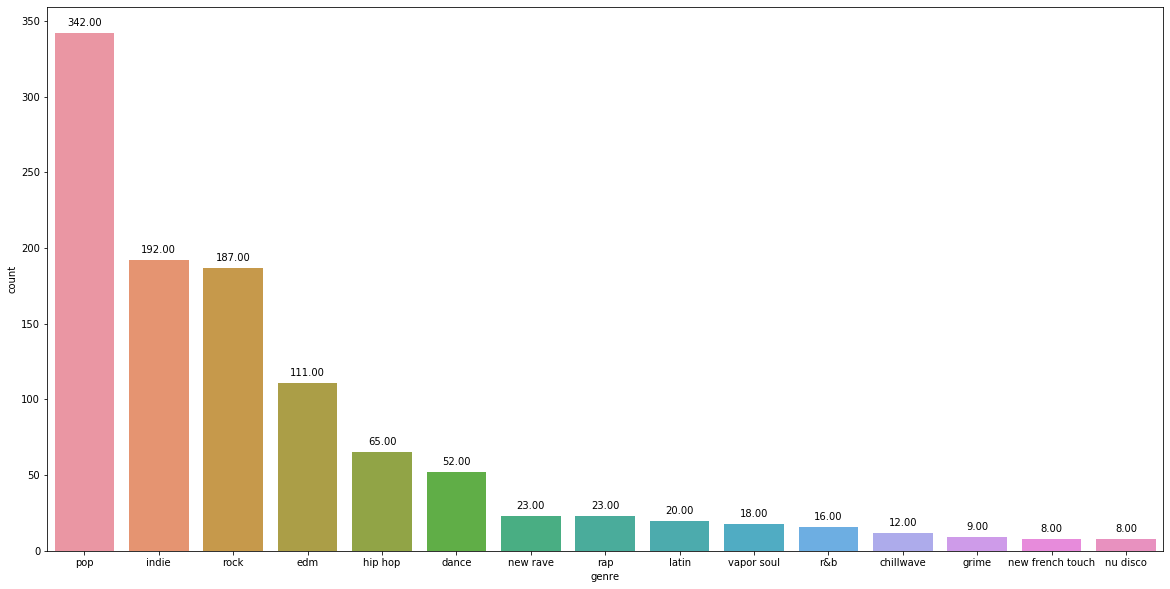

In [46]:
plt.figure(figsize=(20,10))
bplot = sns.barplot(x = "genre", y = "count", data=df_genre.head(15), ci = None)

for p in bplot.patches: # Code to show values: https://github.com/mwaskom/seaborn/issues/1582
    bplot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.savefig('genre_distribution.png')

In [47]:
print((df_genre['count']/df_genre['count'].sum()).head(15))

0     0.281481
1     0.158025
2     0.153909
3     0.091358
4     0.053498
5     0.042798
6     0.018930
7     0.018930
8     0.016461
9     0.014815
10    0.013169
11    0.009877
12    0.007407
13    0.006584
14    0.006584
Name: count, dtype: float64


The first 6 genres account for more than 75% of the genres. It may be worthwhile adding dummy columns to represent these genres.

In [48]:
df

,Unnamed: 0,playlist_name,num_tracks,track_name,track_duration,track_explicit,track_popularity,acousticness,danceability,energy,...,artist2_genres,artist2_popularity,artist3_name,artist3_followers,artist3_genres,artist3_popularity,album_name,album_type,album_popularity,album_release_date
0,0,FIFA 20 Soundtrack,41,Que Calor (feat. J Balvin & El Alfa),169997,False,73,0.037500,0.795,0.885,...,"['latin', 'reggaeton']",95.0,El Alfa,1030909.0,"['dembow', 'latin', 'rap dominicano', 'reggaet...",83.0,Que Calor (feat. J Balvin & El Alfa),single,66,2019-09-11
1,1,FIFA 20 Soundtrack,41,"Yo x Ti, Tu x Mi",201040,False,80,0.462000,0.780,0.759,...,"['latin', 'puerto rican pop', 'reggaeton', 'tr...",93.0,NaN,NaN,NaN,NaN,"Yo x Ti, Tu x Mi",single,73,2019-08-15
2,2,FIFA 20 Soundtrack,41,Swing,179658,False,19,0.006400,0.775,0.717,...,NaN,NaN,NaN,NaN,NaN,NaN,Swing,single,13,2019-07-12
3,3,FIFA 20 Soundtrack,41,Vámono,208329,False,46,0.112000,0.672,0.733,...,NaN,NaN,NaN,NaN,NaN,NaN,Vámono,single,39,2019-09-25
4,4,FIFA 20 Soundtrack,41,Fado,250400,False,42,0.203000,0.821,0.540,...,NaN,NaN,NaN,NaN,NaN,NaN,Fado,single,36,2019-09-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,289,FIFA 18 Soundtrack,45,Caxambu,175000,False,22,0.208000,0.787,0.817,...,NaN,NaN,NaN,NaN,NaN,NaN,Batuk Freak (Instrumentals),album,26,2013-01-01
290,290,FIFA 18 Soundtrack,45,Deela Ding,196937,False,0,0.000058,0.653,0.873,...,NaN,NaN,NaN,NaN,NaN,NaN,Vira a Cara,single,0,2015-07-22
291,291,FIFA 18 Soundtrack,45,11 Acre,197413,False,32,0.000102,0.474,0.970,...,NaN,NaN,NaN,NaN,NaN,NaN,Plastic Soul,album,46,2017-08-04
292,292,FIFA 18 Soundtrack,45,Feels Like Summer,195389,False,46,0.013900,0.468,0.939,...,NaN,NaN,NaN,NaN,NaN,NaN,Feels Like Summer,single,39,2017-03-16


In [49]:
list_of_genres = []
for index, value in df.artist1_genres.items():
    list_string = list(value.replace('\'','').strip('[]').split(', '))
    list_of_genres.append(list_string)
for index, value in df_artist2_genres.items():
    list_string = list(value.replace('\'','').strip('[]').split(', '))
    if list_string == '':
        print(err)
    list_of_genres.append(list_string)
for index, value in df_artist3_genres.items():
    list_string = list(value.replace('\'','').strip('[]').split(', '))
    list_of_genres.append(list_string)

In [50]:
df.artist2_genres = df.artist2_genres.fillna('')
df.artist3_genres = df.artist3_genres.fillna('')

In [51]:
df

,Unnamed: 0,playlist_name,num_tracks,track_name,track_duration,track_explicit,track_popularity,acousticness,danceability,energy,...,artist2_genres,artist2_popularity,artist3_name,artist3_followers,artist3_genres,artist3_popularity,album_name,album_type,album_popularity,album_release_date
0,0,FIFA 20 Soundtrack,41,Que Calor (feat. J Balvin & El Alfa),169997,False,73,0.037500,0.795,0.885,...,"['latin', 'reggaeton']",95.0,El Alfa,1030909.0,"['dembow', 'latin', 'rap dominicano', 'reggaet...",83.0,Que Calor (feat. J Balvin & El Alfa),single,66,2019-09-11
1,1,FIFA 20 Soundtrack,41,"Yo x Ti, Tu x Mi",201040,False,80,0.462000,0.780,0.759,...,"['latin', 'puerto rican pop', 'reggaeton', 'tr...",93.0,NaN,NaN,,NaN,"Yo x Ti, Tu x Mi",single,73,2019-08-15
2,2,FIFA 20 Soundtrack,41,Swing,179658,False,19,0.006400,0.775,0.717,...,,NaN,NaN,NaN,,NaN,Swing,single,13,2019-07-12
3,3,FIFA 20 Soundtrack,41,Vámono,208329,False,46,0.112000,0.672,0.733,...,,NaN,NaN,NaN,,NaN,Vámono,single,39,2019-09-25
4,4,FIFA 20 Soundtrack,41,Fado,250400,False,42,0.203000,0.821,0.540,...,,NaN,NaN,NaN,,NaN,Fado,single,36,2019-09-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,289,FIFA 18 Soundtrack,45,Caxambu,175000,False,22,0.208000,0.787,0.817,...,,NaN,NaN,NaN,,NaN,Batuk Freak (Instrumentals),album,26,2013-01-01
290,290,FIFA 18 Soundtrack,45,Deela Ding,196937,False,0,0.000058,0.653,0.873,...,,NaN,NaN,NaN,,NaN,Vira a Cara,single,0,2015-07-22
291,291,FIFA 18 Soundtrack,45,11 Acre,197413,False,32,0.000102,0.474,0.970,...,,NaN,NaN,NaN,,NaN,Plastic Soul,album,46,2017-08-04
292,292,FIFA 18 Soundtrack,45,Feels Like Summer,195389,False,46,0.013900,0.468,0.939,...,,NaN,NaN,NaN,,NaN,Feels Like Summer,single,39,2017-03-16


In [52]:
df['genres'] = df.apply(lambda x: list(x['artist1_genres'].replace('\'','').strip('[]').split(', ')) 
                + list(x['artist2_genres'].replace('\'','').strip('[]').split(', ')) 
                + list(x['artist3_genres'].replace('\'','').strip('[]').split(', ')), axis=1)

In [53]:
df

,Unnamed: 0,playlist_name,num_tracks,track_name,track_duration,track_explicit,track_popularity,acousticness,danceability,energy,...,artist2_popularity,artist3_name,artist3_followers,artist3_genres,artist3_popularity,album_name,album_type,album_popularity,album_release_date,genres
0,0,FIFA 20 Soundtrack,41,Que Calor (feat. J Balvin & El Alfa),169997,False,73,0.037500,0.795,0.885,...,95.0,El Alfa,1030909.0,"['dembow', 'latin', 'rap dominicano', 'reggaet...",83.0,Que Calor (feat. J Balvin & El Alfa),single,66,2019-09-11,"[dance pop, edm, electro house, moombahton, po..."
1,1,FIFA 20 Soundtrack,41,"Yo x Ti, Tu x Mi",201040,False,80,0.462000,0.780,0.759,...,93.0,NaN,NaN,,NaN,"Yo x Ti, Tu x Mi",single,73,2019-08-15,"[r&b en espanol, latin, puerto rican pop, regg..."
2,2,FIFA 20 Soundtrack,41,Swing,179658,False,19,0.006400,0.775,0.717,...,NaN,NaN,NaN,,NaN,Swing,single,13,2019-07-12,"[electropop, pop, , ]"
3,3,FIFA 20 Soundtrack,41,Vámono,208329,False,46,0.112000,0.672,0.733,...,NaN,NaN,NaN,,NaN,Vámono,single,39,2019-09-25,"[indietronica, latintronica, puerto rican indi..."
4,4,FIFA 20 Soundtrack,41,Fado,250400,False,42,0.203000,0.821,0.540,...,NaN,NaN,NaN,,NaN,Fado,single,36,2019-09-27,"[german pop, , ]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,289,FIFA 18 Soundtrack,45,Caxambu,175000,False,22,0.208000,0.787,0.817,...,NaN,NaN,NaN,,NaN,Batuk Freak (Instrumentals),album,26,2013-01-01,"[afrofuturismo brasileiro, baile pop, brazilia..."
290,290,FIFA 18 Soundtrack,45,Deela Ding,196937,False,0,0.000058,0.653,0.873,...,NaN,NaN,NaN,,NaN,Vira a Cara,single,0,2015-07-22,"[funk carioca, , ]"
291,291,FIFA 18 Soundtrack,45,11 Acre,197413,False,32,0.000102,0.474,0.970,...,NaN,NaN,NaN,,NaN,Plastic Soul,album,46,2017-08-04,"[alternative americana, modern alternative roc..."
292,292,FIFA 18 Soundtrack,45,Feels Like Summer,195389,False,46,0.013900,0.468,0.939,...,NaN,NaN,NaN,,NaN,Feels Like Summer,single,39,2017-03-16,"[alternative rock, modern power pop, modern ro..."


In [54]:
# remove blank genres
for index, row in df.iterrows():
    row['genres'][:] = [x for x in row['genres'] if x != '']

In [55]:
df = df.drop(['artist1_genres', 'artist2_genres','artist3_genres','Unnamed: 0'], axis=1)

In [56]:
# Columns to indicate prescence of pop, indie, rock, edm, hip hop, dance
df['pop'] = df['genres'].apply(lambda x: 1 if any('pop' in s for s in x) else 0)
df['indie'] = df['genres'].apply(lambda x: 1 if any('indie' in s for s in x) else 0)
df['rock'] = df['genres'].apply(lambda x: 1 if any('rock' in s for s in x) else 0)
df['edm'] = df['genres'].apply(lambda x: 1 if (any('edm' in s for s in x) or any('elec' in s for s in x) or any('house' in s for s in x)) else 0)
df['hip hop'] = df['genres'].apply(lambda x: 1 if any('hip hop' in s for s in x) else 0)
df['dance'] = df['genres'].apply(lambda x: 1 if any('dance' in s for s in x) else 0)

In [57]:
# Change False/True to 0/1
df['track_explicit'] = df['track_explicit'].apply(lambda x: 0 if x == False else 1)

In [58]:
df

,playlist_name,num_tracks,track_name,track_duration,track_explicit,track_popularity,acousticness,danceability,energy,instrumentalness,...,album_type,album_popularity,album_release_date,genres,pop,indie,rock,edm,hip hop,dance
0,FIFA 20 Soundtrack,41,Que Calor (feat. J Balvin & El Alfa),169997,0,73,0.037500,0.795,0.885,0.006380,...,single,66,2019-09-11,"[dance pop, edm, electro house, moombahton, po...",1,0,0,1,0,1
1,FIFA 20 Soundtrack,41,"Yo x Ti, Tu x Mi",201040,0,80,0.462000,0.780,0.759,0.000868,...,single,73,2019-08-15,"[r&b en espanol, latin, puerto rican pop, regg...",1,0,0,0,0,0
2,FIFA 20 Soundtrack,41,Swing,179658,0,19,0.006400,0.775,0.717,0.265000,...,single,13,2019-07-12,"[electropop, pop]",1,0,0,1,0,0
3,FIFA 20 Soundtrack,41,Vámono,208329,0,46,0.112000,0.672,0.733,0.373000,...,single,39,2019-09-25,"[indietronica, latintronica, puerto rican indie]",0,1,0,0,0,0
4,FIFA 20 Soundtrack,41,Fado,250400,0,42,0.203000,0.821,0.540,0.000657,...,single,36,2019-09-27,[german pop],1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,FIFA 18 Soundtrack,45,Caxambu,175000,0,22,0.208000,0.787,0.817,0.892000,...,album,26,2013-01-01,"[afrofuturismo brasileiro, baile pop, brazilia...",1,1,0,0,1,0
290,FIFA 18 Soundtrack,45,Deela Ding,196937,0,0,0.000058,0.653,0.873,0.000609,...,single,0,2015-07-22,[funk carioca],0,0,0,0,0,0
291,FIFA 18 Soundtrack,45,11 Acre,197413,0,32,0.000102,0.474,0.970,0.054200,...,album,46,2017-08-04,"[alternative americana, modern alternative rock]",0,0,1,0,0,0
292,FIFA 18 Soundtrack,45,Feels Like Summer,195389,0,46,0.013900,0.468,0.939,0.000092,...,single,39,2017-03-16,"[alternative rock, modern power pop, modern ro...",1,0,1,0,0,0


In [59]:
# Average artist popularity and followers
df['avg_artist_following'] = df.apply(lambda x: np.nanmean([x['artist1_followers'],
                                                 x['artist2_followers'], x['artist3_followers']]), axis=1)
df['avg_artist_popularity'] = df.apply(lambda x: np.nanmean([x['artist1_popularity'],
                                                 x['artist2_popularity'], x['artist3_popularity']]), axis=1)

In [60]:
df = df.drop(['artist1_followers', 'artist2_followers', 'artist3_followers',
              'artist1_popularity', 'artist2_popularity', 'artist3_popularity',], axis=1)

In [61]:
df

,playlist_name,num_tracks,track_name,track_duration,track_explicit,track_popularity,acousticness,danceability,energy,instrumentalness,...,album_release_date,genres,pop,indie,rock,edm,hip hop,dance,avg_artist_following,avg_artist_popularity
0,FIFA 20 Soundtrack,41,Que Calor (feat. J Balvin & El Alfa),169997,0,73,0.037500,0.795,0.885,0.006380,...,2019-09-11,"[dance pop, edm, electro house, moombahton, po...",1,0,0,1,0,1,9363300.0,86.666667
1,FIFA 20 Soundtrack,41,"Yo x Ti, Tu x Mi",201040,0,80,0.462000,0.780,0.759,0.000868,...,2019-08-15,"[r&b en espanol, latin, puerto rican pop, regg...",1,0,0,0,0,0,13612422.0,88.500000
2,FIFA 20 Soundtrack,41,Swing,179658,0,19,0.006400,0.775,0.717,0.265000,...,2019-07-12,"[electropop, pop]",1,0,0,1,0,0,405831.0,73.000000
3,FIFA 20 Soundtrack,41,Vámono,208329,0,46,0.112000,0.672,0.733,0.373000,...,2019-09-25,"[indietronica, latintronica, puerto rican indie]",0,1,0,0,0,0,40030.0,49.000000
4,FIFA 20 Soundtrack,41,Fado,250400,0,42,0.203000,0.821,0.540,0.000657,...,2019-09-27,[german pop],1,0,0,0,0,0,1348476.0,76.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,FIFA 18 Soundtrack,45,Caxambu,175000,0,22,0.208000,0.787,0.817,0.892000,...,2013-01-01,"[afrofuturismo brasileiro, baile pop, brazilia...",1,1,0,0,1,0,480668.0,55.000000
290,FIFA 18 Soundtrack,45,Deela Ding,196937,0,0,0.000058,0.653,0.873,0.000609,...,2015-07-22,[funk carioca],0,0,0,0,0,0,4616.0,44.000000
291,FIFA 18 Soundtrack,45,11 Acre,197413,0,32,0.000102,0.474,0.970,0.054200,...,2017-08-04,"[alternative americana, modern alternative rock]",0,0,1,0,0,0,28570.0,49.000000
292,FIFA 18 Soundtrack,45,Feels Like Summer,195389,0,46,0.013900,0.468,0.939,0.000092,...,2017-03-16,"[alternative rock, modern power pop, modern ro...",1,0,1,0,0,0,2040178.0,76.000000


In [62]:
df.columns

Index(['playlist_name', 'num_tracks', 'track_name', 'track_duration',
       'track_explicit', 'track_popularity', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'key', 'loudness', 'mode', 'tempo',
       'valence', 'artist1_name', 'artist2_name', 'artist3_name', 'album_name',
       'album_type', 'album_popularity', 'album_release_date', 'genres', 'pop',
       'indie', 'rock', 'edm', 'hip hop', 'dance', 'avg_artist_following',
       'avg_artist_popularity'],
      dtype='object')

In [63]:
df.album_type.unique()

array(['single', 'album'], dtype=object)

In [64]:
# Change Single/Album to 0/1
df['single'] = df['album_type'].apply(lambda x: 0 if x == 'album' else 1)

In [65]:
df

,playlist_name,num_tracks,track_name,track_duration,track_explicit,track_popularity,acousticness,danceability,energy,instrumentalness,...,genres,pop,indie,rock,edm,hip hop,dance,avg_artist_following,avg_artist_popularity,single
0,FIFA 20 Soundtrack,41,Que Calor (feat. J Balvin & El Alfa),169997,0,73,0.037500,0.795,0.885,0.006380,...,"[dance pop, edm, electro house, moombahton, po...",1,0,0,1,0,1,9363300.0,86.666667,1
1,FIFA 20 Soundtrack,41,"Yo x Ti, Tu x Mi",201040,0,80,0.462000,0.780,0.759,0.000868,...,"[r&b en espanol, latin, puerto rican pop, regg...",1,0,0,0,0,0,13612422.0,88.500000,1
2,FIFA 20 Soundtrack,41,Swing,179658,0,19,0.006400,0.775,0.717,0.265000,...,"[electropop, pop]",1,0,0,1,0,0,405831.0,73.000000,1
3,FIFA 20 Soundtrack,41,Vámono,208329,0,46,0.112000,0.672,0.733,0.373000,...,"[indietronica, latintronica, puerto rican indie]",0,1,0,0,0,0,40030.0,49.000000,1
4,FIFA 20 Soundtrack,41,Fado,250400,0,42,0.203000,0.821,0.540,0.000657,...,[german pop],1,0,0,0,0,0,1348476.0,76.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,FIFA 18 Soundtrack,45,Caxambu,175000,0,22,0.208000,0.787,0.817,0.892000,...,"[afrofuturismo brasileiro, baile pop, brazilia...",1,1,0,0,1,0,480668.0,55.000000,0
290,FIFA 18 Soundtrack,45,Deela Ding,196937,0,0,0.000058,0.653,0.873,0.000609,...,[funk carioca],0,0,0,0,0,0,4616.0,44.000000,1
291,FIFA 18 Soundtrack,45,11 Acre,197413,0,32,0.000102,0.474,0.970,0.054200,...,"[alternative americana, modern alternative rock]",0,0,1,0,0,0,28570.0,49.000000,0
292,FIFA 18 Soundtrack,45,Feels Like Summer,195389,0,46,0.013900,0.468,0.939,0.000092,...,"[alternative rock, modern power pop, modern ro...",1,0,1,0,0,0,2040178.0,76.000000,1


In [66]:
df.to_csv('fifa_spotify_data_cleaned.csv', index=False)